<a href="https://colab.research.google.com/github/Shahilasulthana/Computer-Vision/blob/main/Contrast_stretching_CAT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('foggy_image.jpg',0)

Applied Linear Contrast Stretching which will stretch the minimum and maximum intensity

In [4]:
min_val = np.min(image)
max_val = np.max(image)

stretched = ((image - min_val) / (max_val - min_val)) * (200 - 50) + 50
stretched = np.clip(stretched, 0, 255).astype(np.uint8)


Histogram equalization will distribute the pixel values equally across the image (global equalization)

In [5]:
hist_eq = cv2.equalizeHist(image)

CLAHE will equalize the pixel values locally by considering separate blocks across the image that is what represented as gridsize 8

In [6]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(image)

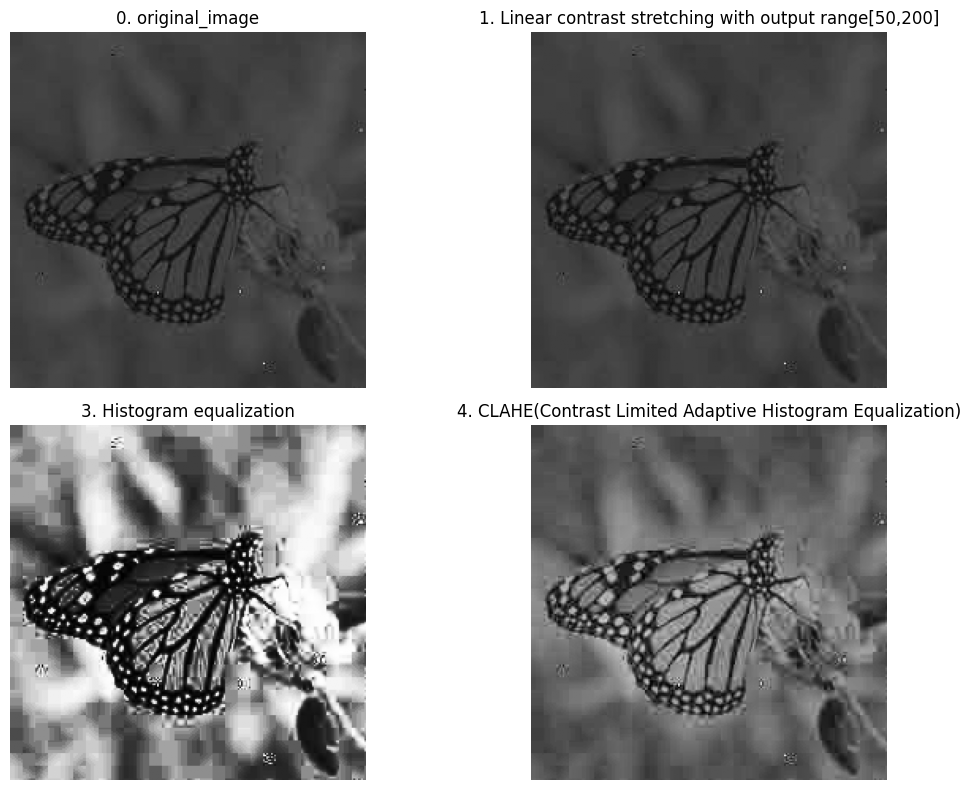

In [7]:
titles = ['0. original_image', '1. Linear contrast stretching with output range[50,200]',
          '3. Histogram equalization', '4. CLAHE(Contrast Limited Adaptive Histogram Equalization)']
images = [image, stretched, hist_eq, clahe_img]
plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

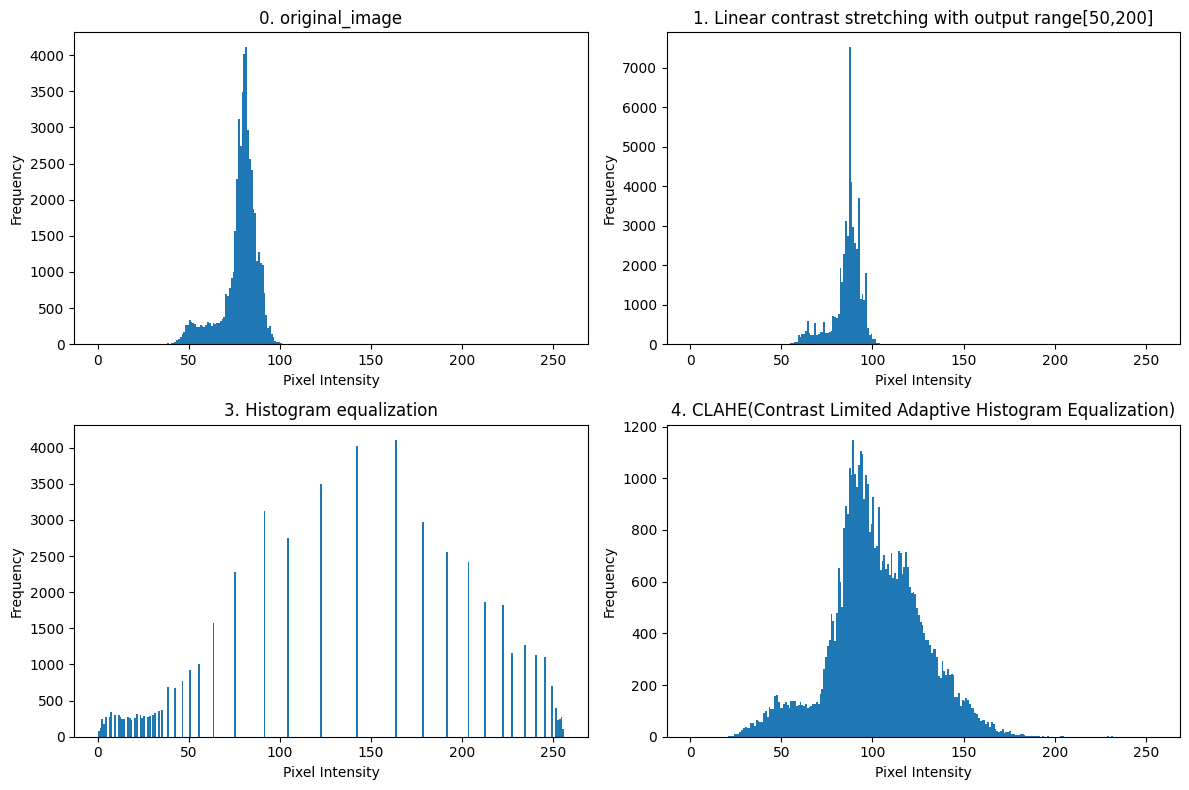

In [8]:
plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(images[i].ravel(), bins=256, range=[0,256])
    plt.title(titles[i])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()